Importing libraries

In [127]:
!pip install --upgrade scikit-learn imbalanced-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

In [128]:
#load data
df  = pd.read_csv("/kaggle/input/flight-delays/flights.csv")
print(f"Dataset shape: {df.shape}")

Dataset shape: (5819079, 31)


In [129]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [130]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [131]:
# Missing values analysis
print("Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Percentage', ascending=False)

print(missing_df[missing_df['Missing_Count'] > 0])

Missing Values Analysis:
                 Column  Missing_Count  Missing_Percentage
25  CANCELLATION_REASON        5729195           98.455357
30        WEATHER_DELAY        4755640           81.724960
29  LATE_AIRCRAFT_DELAY        4755640           81.724960
28        AIRLINE_DELAY        4755640           81.724960
27       SECURITY_DELAY        4755640           81.724960
26     AIR_SYSTEM_DELAY        4755640           81.724960
16             AIR_TIME         105071            1.805629
22        ARRIVAL_DELAY         105071            1.805629
15         ELAPSED_TIME         105071            1.805629
18            WHEELS_ON          92513            1.589822
19              TAXI_IN          92513            1.589822
21         ARRIVAL_TIME          92513            1.589822
12             TAXI_OUT          89047            1.530259
13           WHEELS_OFF          89047            1.530259
11      DEPARTURE_DELAY          86153            1.480526
10       DEPARTURE_TIME        

In [ ]:
print(df.describe())

In [132]:
# Create date column
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

# Basic flight statistics
total_flights = len(df)
cancelled_flights = df['CANCELLED'].sum()
diverted_flights = df['DIVERTED'].sum()
on_time_flights = len(df[(df['DEPARTURE_DELAY'] <= 0) & (df['CANCELLED'] == 0)])

print(f"Total Flights: {total_flights:,}")
print(f"Cancelled Flights: {cancelled_flights:,} ({cancelled_flights/total_flights*100:.2f}%)")
print(f"Diverted Flights: {diverted_flights:,} ({diverted_flights/total_flights*100:.2f}%)")
print(f"On-time Flights: {on_time_flights:,} ({on_time_flights/total_flights*100:.2f}%)")

Total Flights: 5,819,079
Cancelled Flights: 89,884 (1.54%)
Diverted Flights: 15,187 (0.26%)
On-time Flights: 3,606,117 (61.97%)


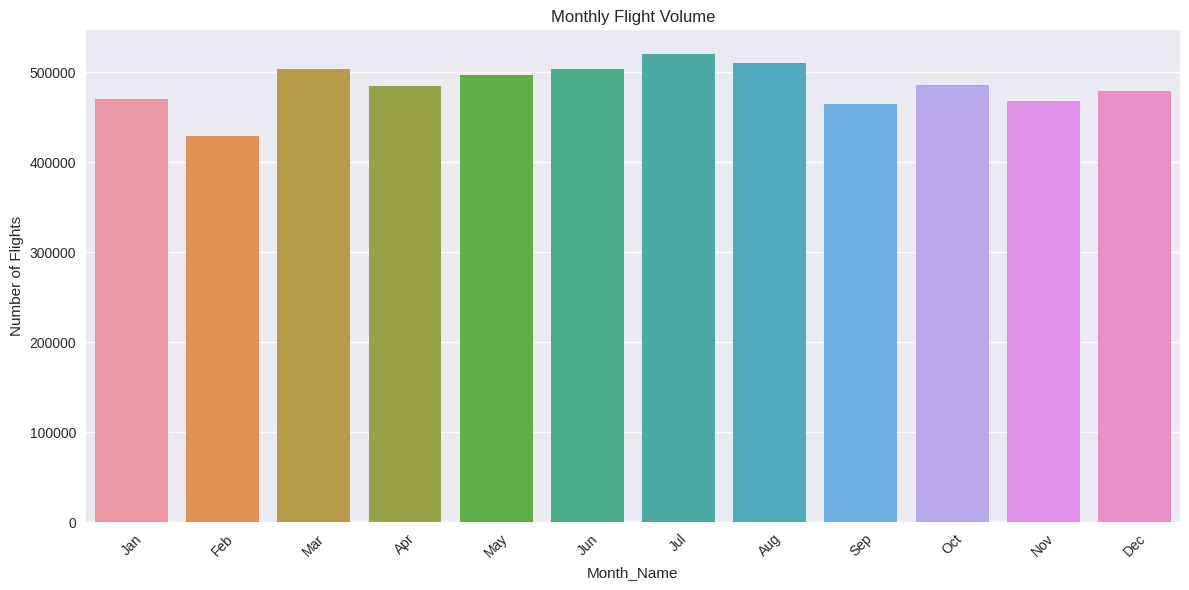

In [133]:
# Monthly flight volume
monthly_flights = df.groupby('MONTH').size().reset_index(name='Flight_Count')
monthly_flights['Month_Name'] = monthly_flights['MONTH'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_flights, x='Month_Name', y='Flight_Count')
plt.title('Monthly Flight Volume')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

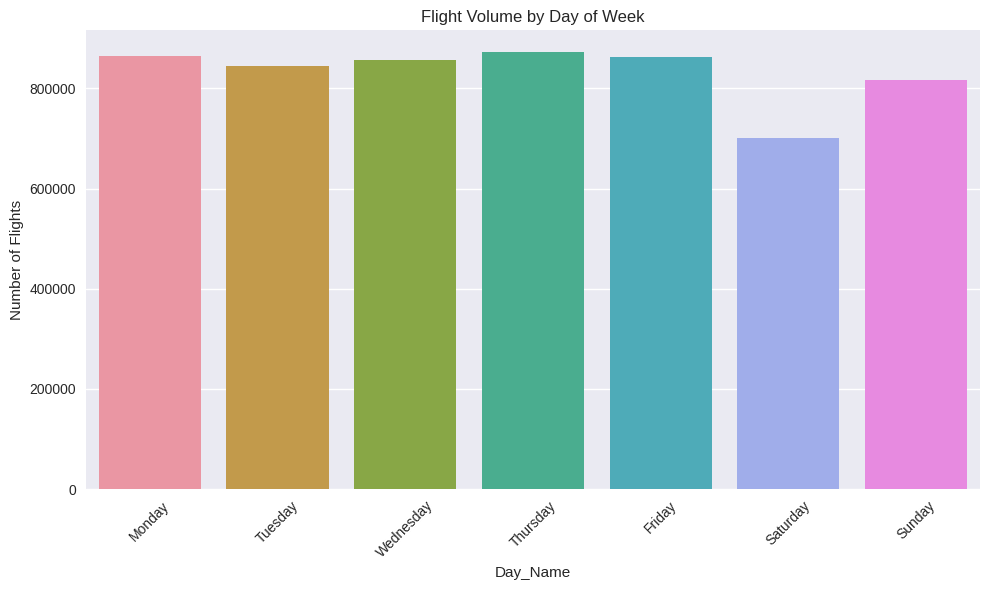

In [134]:
# Day of week analysis
dow_flights = df.groupby('DAY_OF_WEEK').size().reset_index(name='Flight_Count')
dow_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 
             5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
dow_flights['Day_Name'] = dow_flights['DAY_OF_WEEK'].map(dow_names)

plt.figure(figsize=(10, 6))
sns.barplot(data=dow_flights, x='Day_Name', y='Flight_Count')
plt.title('Flight Volume by Day of Week')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [135]:
# Top airlines by flight volume
airline_stats = df.groupby('AIRLINE').agg({
    'FLIGHT_NUMBER': 'count',
    'DEPARTURE_DELAY': 'mean',
    'ARRIVAL_DELAY': 'mean',
    'CANCELLED': 'sum',
    'DIVERTED': 'sum'
}).round(2)

airline_stats.columns = ['Total_Flights', 'Avg_Departure_Delay', 'Avg_Arrival_Delay', 
                        'Cancelled_Flights', 'Diverted_Flights']
airline_stats = airline_stats.sort_values('Total_Flights', ascending=False)

print("🏢 Top 10 Airlines by Flight Volume:")
print(airline_stats.head(10))

🏢 Top 10 Airlines by Flight Volume:
         Total_Flights  Avg_Departure_Delay  Avg_Arrival_Delay  \
AIRLINE                                                          
WN             1261855                10.58               4.37   
DL              875881                 7.37               0.19   
AA              725984                 8.90               3.45   
OO              588353                 7.80               5.85   
EV              571977                 8.72               6.59   
UA              515723                14.44               5.43   
MQ              294632                10.13               6.46   
B6              267048                11.51               6.68   
US              198715                 6.14               3.71   
AS              172521                 1.79              -0.98   

         Cancelled_Flights  Diverted_Flights  
AIRLINE                                       
WN                   16043              3409  
DL                    3824    

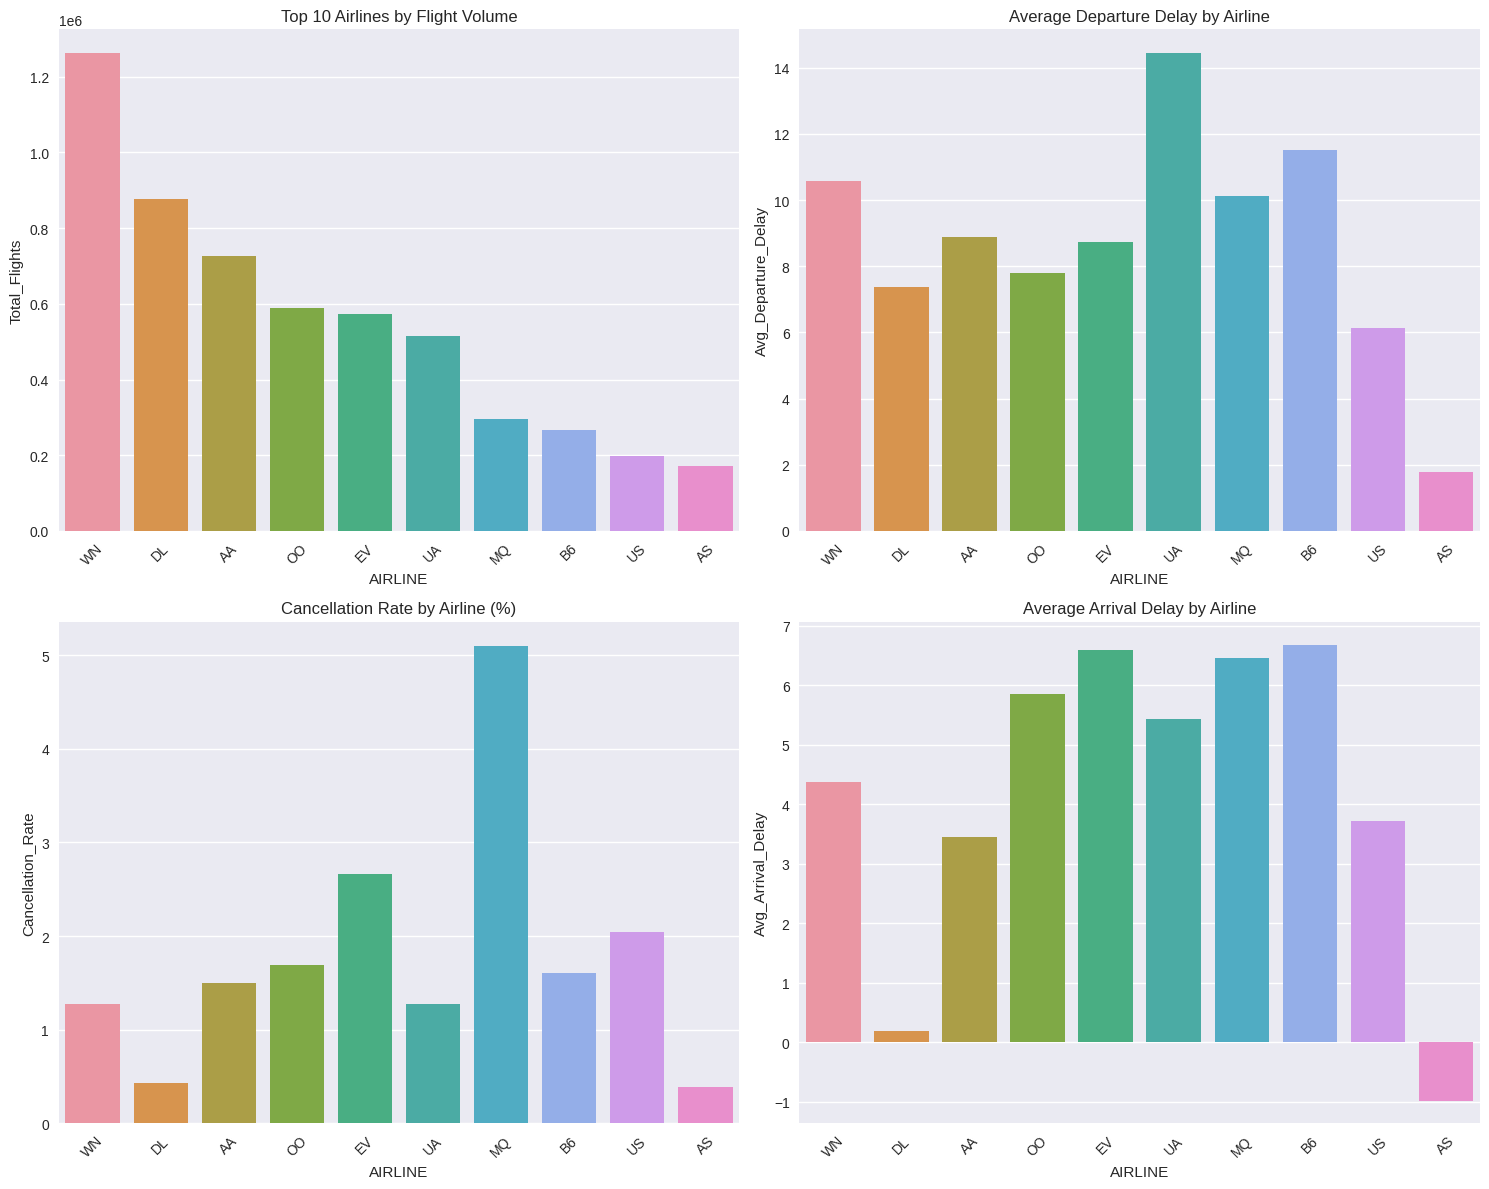

In [136]:
#Airline performance visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Flight volume
top_airlines = airline_stats.head(10)
sns.barplot(data=top_airlines.reset_index(), x='AIRLINE', y='Total_Flights', ax=axes[0,0])
axes[0,0].set_title('Top 10 Airlines by Flight Volume')
axes[0,0].tick_params(axis='x', rotation=45)

# Average departure delay
sns.barplot(data=top_airlines.reset_index(), x='AIRLINE', y='Avg_Departure_Delay', ax=axes[0,1])
axes[0,1].set_title('Average Departure Delay by Airline')
axes[0,1].tick_params(axis='x', rotation=45)

# Cancellation rate
top_airlines['Cancellation_Rate'] = (top_airlines['Cancelled_Flights'] / top_airlines['Total_Flights']) * 100
sns.barplot(data=top_airlines.reset_index(), x='AIRLINE', y='Cancellation_Rate', ax=axes[1,0])
axes[1,0].set_title('Cancellation Rate by Airline (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Average arrival delay
sns.barplot(data=top_airlines.reset_index(), x='AIRLINE', y='Avg_Arrival_Delay', ax=axes[1,1])
axes[1,1].set_title('Average Arrival Delay by Airline')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

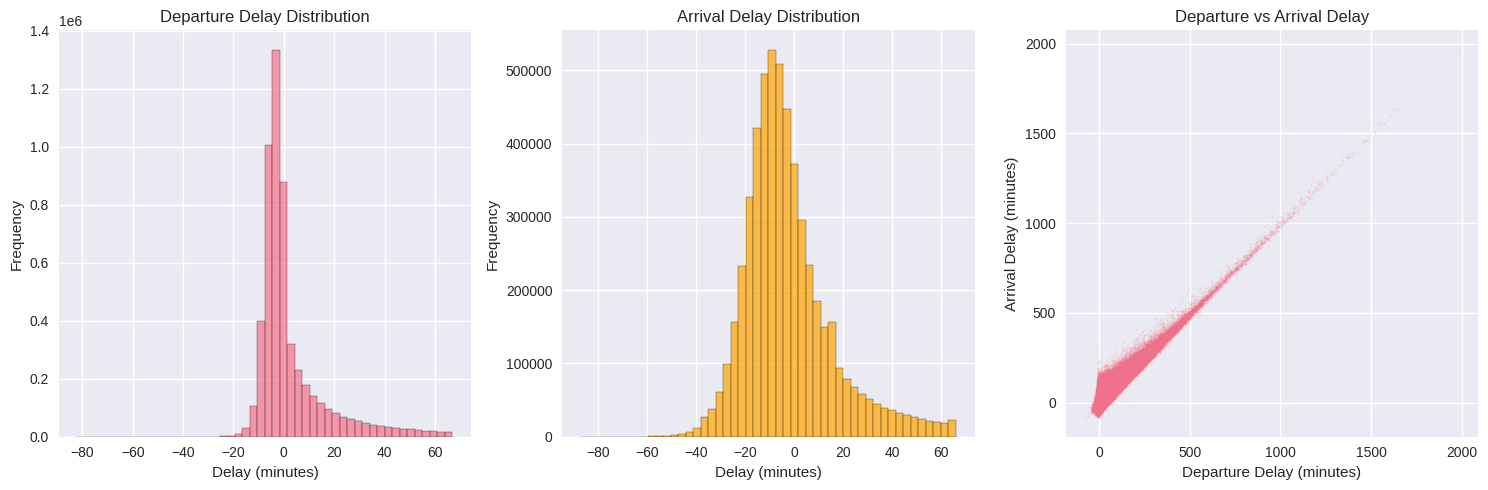

In [137]:
# Filter out cancelled flights for delay analysis
active_flights = df[df['CANCELLED'] == 0].copy()

# Departure delay distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Remove extreme outliers for better visualization
delay_percentile = np.percentile(active_flights['DEPARTURE_DELAY'].dropna(), 95)
delay_data = active_flights[active_flights['DEPARTURE_DELAY'] <= delay_percentile]['DEPARTURE_DELAY']
plt.hist(delay_data, bins=50, alpha=0.7, edgecolor='black')
plt.title('Departure Delay Distribution')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
arrival_delay_percentile = np.percentile(active_flights['ARRIVAL_DELAY'].dropna(), 95)
arrival_delay_data = active_flights[active_flights['ARRIVAL_DELAY'] <= arrival_delay_percentile]['ARRIVAL_DELAY']
plt.hist(arrival_delay_data, bins=50, alpha=0.7, edgecolor='black', color='orange')
plt.title('Arrival Delay Distribution')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(active_flights['DEPARTURE_DELAY'], active_flights['ARRIVAL_DELAY'], 
           alpha=0.1, s=1)
plt.title('Departure vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')

plt.tight_layout()
plt.show()

In [138]:
# Delay statistics
print("📊 Delay Statistics:")
delay_stats = active_flights[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].describe()
print(delay_stats)

📊 Delay Statistics:
       DEPARTURE_DELAY  ARRIVAL_DELAY
count     5.729195e+06   5.714008e+06
mean      9.338837e+00   4.407057e+00
std       3.699246e+01   3.927130e+01
min      -8.200000e+01  -8.700000e+01
25%      -5.000000e+00  -1.300000e+01
50%      -2.000000e+00  -5.000000e+00
75%       7.000000e+00   8.000000e+00
max       1.988000e+03   1.971000e+03


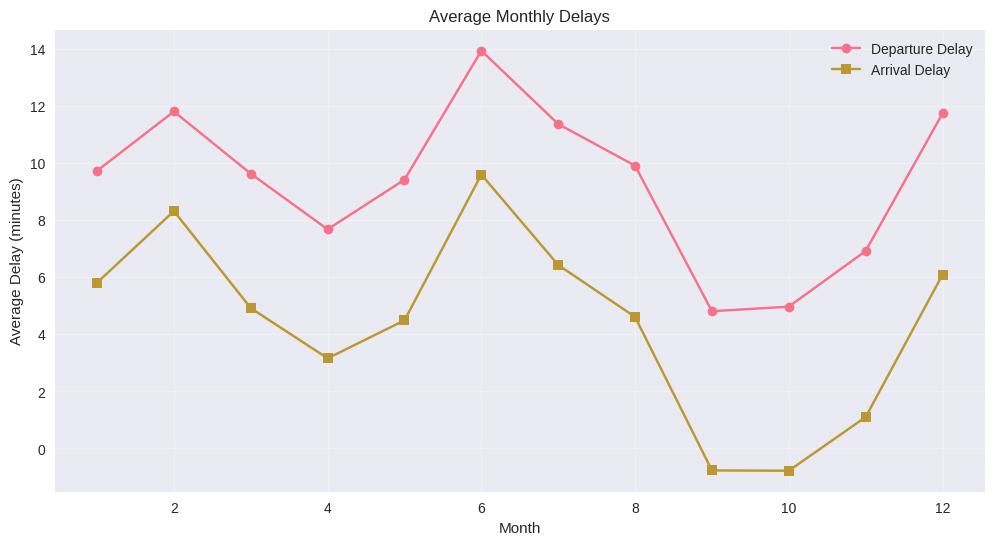

In [139]:
# Delay by month
monthly_delays = active_flights.groupby('MONTH').agg({
    'DEPARTURE_DELAY': 'mean',
    'ARRIVAL_DELAY': 'mean'
}).round(2)

plt.figure(figsize=(12, 6))
plt.plot(monthly_delays.index, monthly_delays['DEPARTURE_DELAY'], 
         marker='o', label='Departure Delay')
plt.plot(monthly_delays.index, monthly_delays['ARRIVAL_DELAY'], 
         marker='s', label='Arrival Delay')
plt.title('Average Monthly Delays')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

🛣️  Top 15 Most Popular Routes:
ROUTE
SFOLAX    13744
LAXSFO    13457
JFKLAX    12016
LAXJFK    12015
LASLAX     9715
LGAORD     9639
LAXLAS     9594
ORDLGA     9575
SFOJFK     8440
JFKSFO     8437
OGGHNL     8313
HNLOGG     8282
LAXORD     8256
ATLLGA     8234
LGAATL     8215
Name: count, dtype: int64


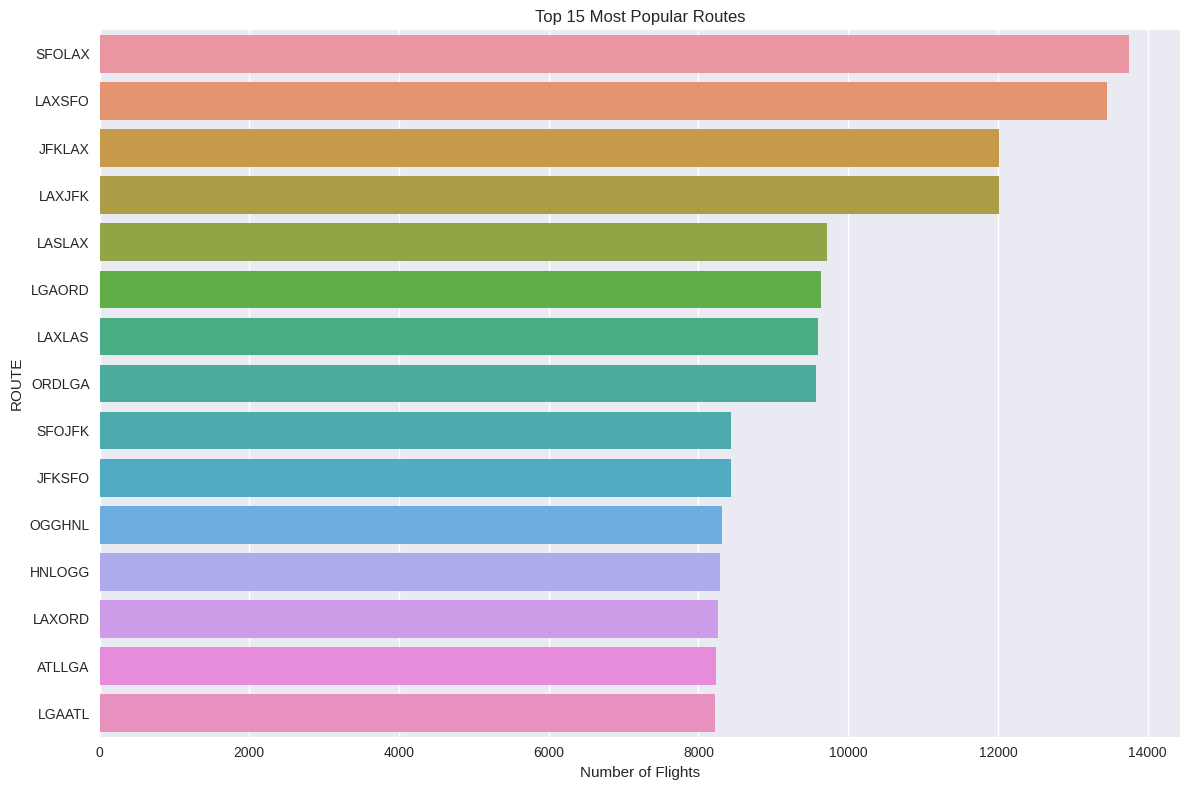

In [140]:
# Create route column
df['ROUTE'] = df['ORIGIN_AIRPORT']  + df['DESTINATION_AIRPORT']

# Most popular routes
popular_routes = df['ROUTE'].value_counts().head(15)
print("🛣️  Top 15 Most Popular Routes:")
print(popular_routes)

plt.figure(figsize=(12, 8))
sns.barplot(x=popular_routes.values, y=popular_routes.index)
plt.title('Top 15 Most Popular Routes')
plt.xlabel('Number of Flights')
plt.tight_layout()
plt.show()

In [141]:
# Busiest airports
print("\n🏢 Busiest Origin Airports:")
busiest_origins = df['ORIGIN_AIRPORT'].value_counts().head(10)
print(busiest_origins)
print("\n🏢 Busiest Destination Airports:")
busiest_destinations = df['DESTINATION_AIRPORT'].value_counts().head(10)
print(busiest_destinations)


🏢 Busiest Origin Airports:
ORIGIN_AIRPORT
ATL    346836
ORD    285884
DFW    239551
DEN    196055
LAX    194673
SFO    148008
PHX    146815
IAH    146622
LAS    133181
MSP    112117
Name: count, dtype: int64

🏢 Busiest Destination Airports:
DESTINATION_AIRPORT
ATL    346904
ORD    285906
DFW    239582
DEN    196010
LAX    194696
SFO    147966
PHX    146812
IAH    146683
LAS    133198
MSP    112128
Name: count, dtype: int64


In [142]:
# Airport performance
airport_performance = active_flights.groupby('ORIGIN_AIRPORT').agg({
    'FLIGHT_NUMBER': 'count',
    'DEPARTURE_DELAY': 'mean',
    'DISTANCE': 'mean'
}).round(2)
airport_performance.columns = ['Total_Flights', 'Avg_Departure_Delay', 'Avg_Distance']
airport_performance = airport_performance.sort_values('Total_Flights', ascending=False)

print("\n🏢 Top 10 Airport Performance:")
print(airport_performance.head(10))


🏢 Top 10 Airport Performance:
                Total_Flights  Avg_Departure_Delay  Avg_Distance
ORIGIN_AIRPORT                                                  
ATL                    344279                 9.33        640.29
ORD                    277336                14.07        722.45
DFW                    233297                11.44        787.67
DEN                    193932                11.81        876.69
LAX                    192509                10.65       1252.54
PHX                    145913                 8.65        967.19
SFO                    145860                11.17       1201.66
IAH                    144492                11.52        826.25
LAS                    132245                10.94        997.37
MSP                    111309                 7.24        810.71


In [ ]:
# Distance analysis
print("Distance Statistics:")
print(df['DISTANCE'].describe())

In [ ]:
# Distance 
plt.figure(figsize=(15, 5))
plt.hist(df['DISTANCE'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Flight Distance Distribution')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

🕐 Delay Causes Analysis:
       AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
count     950873.000000   950873.000000  950873.000000        950873.000000   
mean          11.977555        0.085162      21.177720            26.251593   
std           28.777464        2.266605      50.467607            44.876877   
min            0.000000        0.000000       0.000000             0.000000   
25%            0.000000        0.000000       0.000000             0.000000   
50%            0.000000        0.000000       5.000000             9.000000   
75%           13.000000        0.000000      21.000000            33.000000   
max         1134.000000      573.000000    1971.000000          1331.000000   

       WEATHER_DELAY  
count  950873.000000  
mean        3.245295  
std        21.575930  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max      1211.000000  

📊 Average Delay by Cause:
LATE_AIRCRAFT_DELAY    26.251

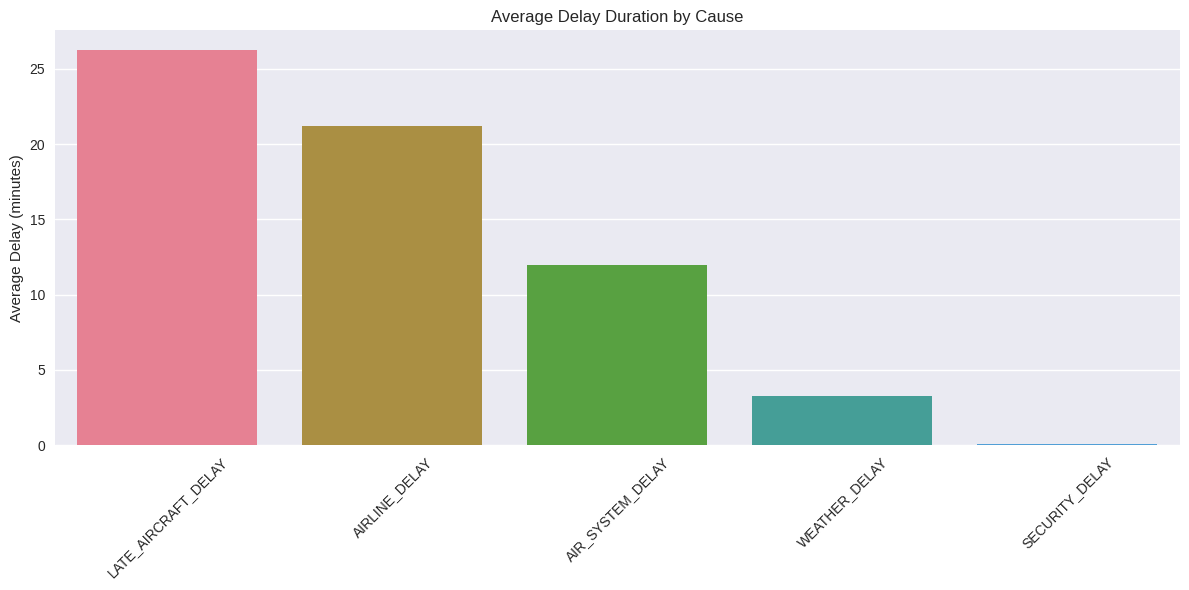

In [143]:
# Analyze delay causes (only for flights with delays)
delay_causes = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
                'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

delayed_flights = active_flights[active_flights['DEPARTURE_DELAY'] > 0]

print("🕐 Delay Causes Analysis:")
cause_stats = delayed_flights[delay_causes].describe()
print(cause_stats)

# Average delay by cause
avg_delays_by_cause = delayed_flights[delay_causes].mean().sort_values(ascending=False)
print("\n📊 Average Delay by Cause:")
print(avg_delays_by_cause)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_delays_by_cause.index, y=avg_delays_by_cause.values)
plt.title('Average Delay Duration by Cause')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Delay cause frequency
cause_frequency = delayed_flights[delay_causes].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=cause_frequency.index, y=cause_frequency.values)
plt.title('Frequency of Delay Causes')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

❌ Total Cancelled Flights: 89,884

📋 Cancellation Reasons:
CANCELLATION_REASON
B    48851
A    25262
C    15749
D       22
Name: count, dtype: int64

🏢 Top 10 Airlines by Cancellations:
AIRLINE
WN    16043
EV    15231
MQ    15025
AA    10919
OO     9960
UA     6573
B6     4276
US     4067
DL     3824
NK     2004
dtype: int64


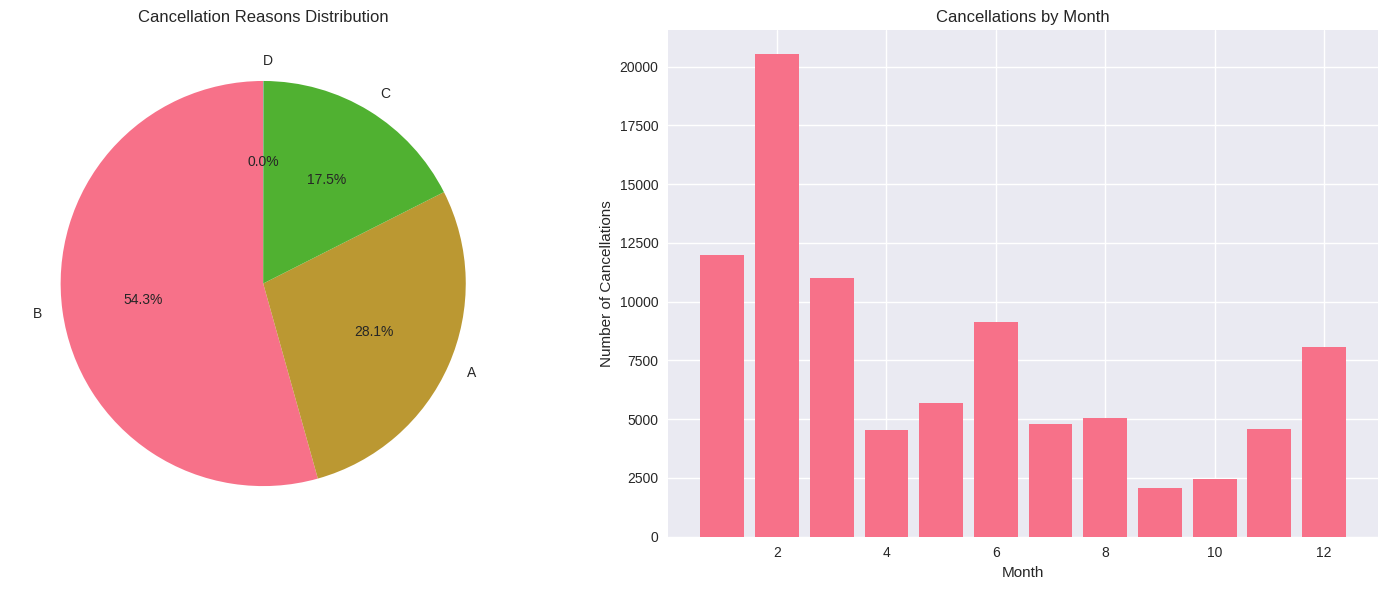

In [144]:
cancelled_flights_df = df[df['CANCELLED'] == 1]

if len(cancelled_flights_df) > 0:
    print(f"❌ Total Cancelled Flights: {len(cancelled_flights_df):,}")
    
    # Cancellation reasons
    cancellation_reasons = cancelled_flights_df['CANCELLATION_REASON'].value_counts()
    print("\n📋 Cancellation Reasons:")
    print(cancellation_reasons)
    
    # Cancellation by airline
    airline_cancellations = cancelled_flights_df.groupby('AIRLINE').size().sort_values(ascending=False)
    print("\n🏢 Top 10 Airlines by Cancellations:")
    print(airline_cancellations.head(10))
    
    # Visualizations
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Cancellation reasons pie chart
    if not cancellation_reasons.empty:
        axes[0].pie(cancellation_reasons.values, labels=cancellation_reasons.index, 
                   autopct='%1.1f%%', startangle=90)
        axes[0].set_title('Cancellation Reasons Distribution')
    
    # Monthly cancellations
    monthly_cancellations = cancelled_flights_df.groupby('MONTH').size()
    axes[1].bar(monthly_cancellations.index, monthly_cancellations.values)
    axes[1].set_title('Cancellations by Month')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Number of Cancellations')
    
    plt.tight_layout()
    plt.show()

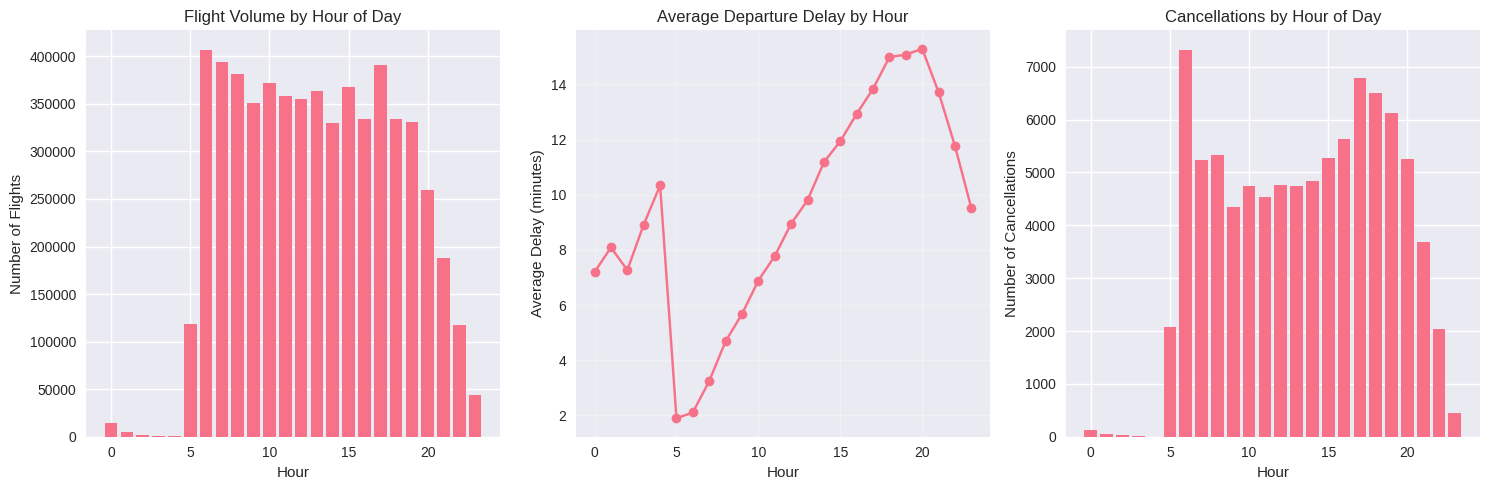

In [145]:
#Hour of day analysis (from scheduled departure)
df['DEPARTURE_HOUR'] = (df['SCHEDULED_DEPARTURE'] // 100).astype(int)
hourly_patterns = df.groupby('DEPARTURE_HOUR').agg({
    'FLIGHT_NUMBER': 'count',
    'DEPARTURE_DELAY': 'mean',
    'CANCELLED': 'sum'
}).round(2)

hourly_patterns.columns = ['Flight_Count', 'Avg_Delay', 'Cancellations']

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(hourly_patterns.index, hourly_patterns['Flight_Count'])
plt.title('Flight Volume by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Flights')

plt.subplot(1, 3, 2)
plt.plot(hourly_patterns.index, hourly_patterns['Avg_Delay'], marker='o')
plt.title('Average Departure Delay by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Delay (minutes)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.bar(hourly_patterns.index, hourly_patterns['Cancellations'])
plt.title('Cancellations by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Cancellations')

plt.tight_layout()
plt.show()

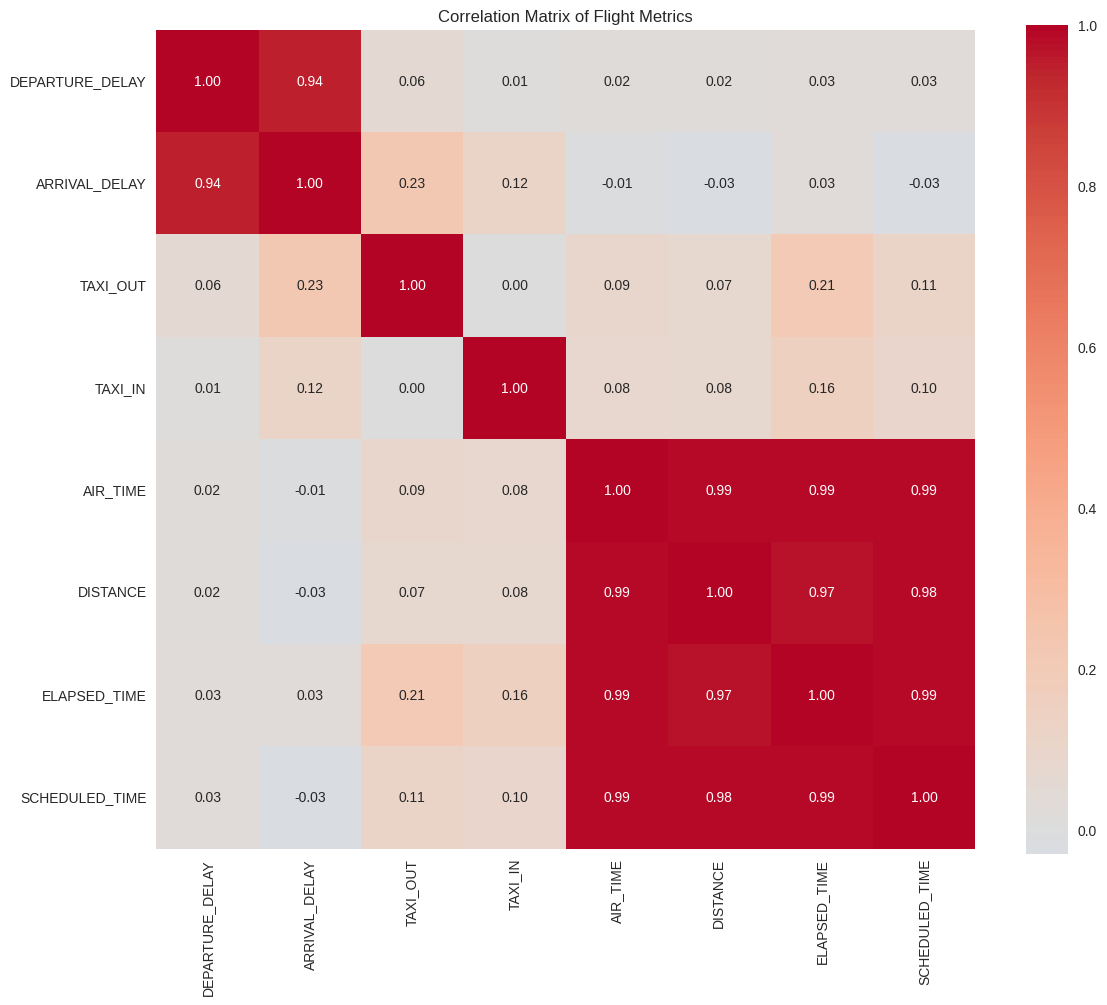

In [146]:
# Select numeric columns for correlation
numeric_cols = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TAXI_OUT', 'TAXI_IN', 
                'AIR_TIME', 'DISTANCE', 'ELAPSED_TIME', 'SCHEDULED_TIME']

correlation_matrix = active_flights[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Flight Metrics')
plt.tight_layout()
plt.show()

In [147]:
# Calculate key metrics
avg_departure_delay = active_flights['DEPARTURE_DELAY'].mean()
avg_arrival_delay = active_flights['ARRIVAL_DELAY'].mean()
cancellation_rate = (cancelled_flights / total_flights) * 100
busiest_month = monthly_flights.loc[monthly_flights['Flight_Count'].idxmax(), 'Month_Name']
worst_delay_airline = airline_stats.loc[airline_stats['Avg_Departure_Delay'].idxmax()].name

print(f"✈️  Average departure delay: {avg_departure_delay:.1f} minutes")
print(f"✈️  Average arrival delay: {avg_arrival_delay:.1f} minutes")
print(f"❌ Overall cancellation rate: {cancellation_rate:.2f}%")
print(f"📅 Busiest month: {busiest_month}")
print(f"🏢 Airline with highest avg delay: {worst_delay_airline}")


✈️  Average departure delay: 9.3 minutes
✈️  Average arrival delay: 4.4 minutes
❌ Overall cancellation rate: 1.54%
📅 Busiest month: Jul
🏢 Airline with highest avg delay: NK


In [148]:
# Target variable (Delayed if >= 15 min)
df['DELAYED'] = (df['ARRIVAL_DELAY'] >= 15).astype(int)

# Drop leakage columns (contain future info not available at departure time)
leakage_cols = [
    'DEPARTURE_TIME','DEPARTURE_DELAY','WHEELS_OFF','WHEELS_ON',
    'TAXI_IN','TAXI_OUT','ARRIVAL_TIME','ARRIVAL_DELAY',
    'AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY','DIVERTED','CANCELLED','CANCELLATION_REASON'
]
df.drop(columns=leakage_cols, inplace=True, errors="ignore")

# Handle missing values
df = df.dropna(subset=['YEAR','MONTH','DAY','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT'])

# Handle outliers: Winsorize distance (replace extreme values with 1st/99th percentile)
q_low, q_high = df['DISTANCE'].quantile([0.01, 0.99])
df['DISTANCE'] = np.clip(df['DISTANCE'], q_low, q_high)

# Why? 
# - Drop leakage → prevents data leakage 
# - Drop NA in critical columns → ensures clean categorical mapping
# - Winsorize distance → avoids extreme outlier routes dominating splits

In [149]:
# Convert date fields into useful features
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH','DAY']])

# Day of week (0=Monday, 6=Sunday)
df['DAY_OF_WEEK'] = df['DATE'].dt.dayofweek

# Part of day from scheduled departure
def get_part_of_day(x):
    if 500 <= x < 1200:
        return 'Morning'
    elif 1200 <= x < 1700:
        return 'Afternoon'
    elif 1700 <= x < 2100:
        return 'Evening'
    else:
        return 'Night'
df['PART_OF_DAY'] = df['SCHEDULED_DEPARTURE'].apply(get_part_of_day)

# Rolling historical delay rate per origin airport (7-day window)
df.sort_values(['ORIGIN_AIRPORT','DATE'], inplace=True)
df['ROLLING_7D_DELAY_ORIGIN'] = (
    df.groupby('ORIGIN_AIRPORT')['DELAYED']
      .rolling(window=7, min_periods=1).mean()
      .reset_index(level=0, drop=True)
)

# Ratio feature: flight distance per scheduled time (proxy for airspeed)
df['DISTANCE_PER_MINUTE'] = df['DISTANCE'] / (df['SCHEDULED_TIME'] + 1)

# Why?
# - Day of week & part of day → captures temporal patterns of congestion/weather
# - Rolling delay → airport reliability context
# - Distance/time ratio → distinguishes short vs long flights more meaningfully


In [150]:
pip install -U category_encoders

Note: you may need to restart the kernel to use updated packages.


In [151]:
from category_encoders.target_encoder import TargetEncoder

# Categorical columns
categorical_cols = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','PART_OF_DAY']

# Target Encoding → replaces categories with mean delay probability
encoder = TargetEncoder(cols=categorical_cols, smoothing=0.3)
df[categorical_cols] = encoder.fit_transform(df[categorical_cols], df['DELAYED'])

# Why Target Encoding? 
# - Handles high-cardinality (e.g., airports)
# - Captures correlation with target better than LabelEncoder
# - Avoids sparse matrices from One-Hot on large categorical features


In [152]:
from sklearn.preprocessing import RobustScaler

# Numerical columns (exclude target)
num_cols = df.select_dtypes(include=[np.number]).columns.drop('DELAYED')

# RobustScaler → reduces effect of outliers compared to StandardScaler/MinMax
scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Why RobustScaler? 
# - Resistant to extreme values (common in distance, delay-related data)
# - Keeps median-centered features → good for skewed distributions


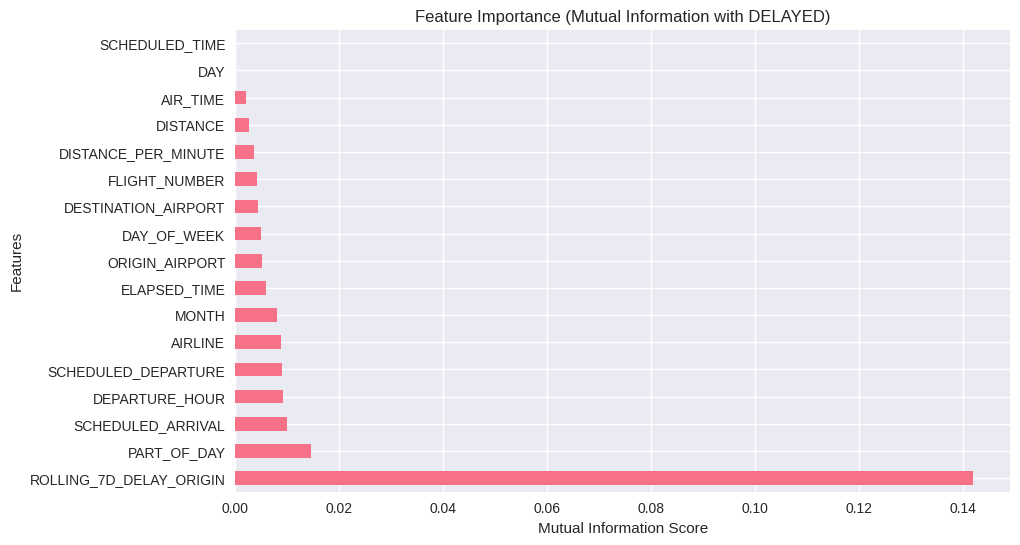

Selected 15 features
Final sample shape: (50000, 16)


In [154]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd

# Take only 50,000 random samples (for speed)
df_sampled = df.sample(n=50000, random_state=42)

# Separate features and target
X = df_sampled.drop(columns=['DELAYED'])
y = df_sampled['DELAYED']

# Keep only numeric columns
X = X.select_dtypes(include=['int64','float64'])

# Fill any leftover NaNs with median (safe choice for numeric features)
X = X.fillna(X.median())

# 1) Variance Threshold
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X)
kept_features = X.columns[selector.get_support()]

# 2) Mutual Information
mi_scores = mutual_info_classif(X[kept_features], y, discrete_features=False)
mi_series = pd.Series(mi_scores, index=kept_features).sort_values(ascending=False)

# Keep only important features (MI > 0.001)
important_features = mi_series[mi_series > 0.001].index.tolist()

# Final dataset
df_final = pd.concat([X[important_features], y], axis=1)

# Plot Mutual Information
plt.figure(figsize=(10,6))
mi_series.plot(kind='barh')
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("Feature Importance (Mutual Information with DELAYED)")
plt.show()

print("Selected", len(important_features), "features")
print("Final sample shape:", df_final.shape)


In [157]:
df.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,DATE,ROUTE,DEPARTURE_HOUR,DELAYED,PART_OF_DAY,ROLLING_7D_DELAY_ORIGIN,DISTANCE_PER_MINUTE
4392604,0.0,0.6,-1.0,0.0,0.294343,1.3372,N867AS,-0.187004,-2.132927,-0.153752,0.079545,0.325581,0.357143,0.065312,-0.136139,2015-10-01,20532,-0.125,0,0.000000,-0.5,-0.017233
4392712,0.0,0.6,-1.0,0.0,0.294343,1.7284,N12996,-0.187004,-1.618659,-0.147601,0.079545,0.197674,0.107143,0.011611,-0.253713,2015-10-01,24065,-0.125,0,0.000000,-0.5,-0.167590
4393536,0.0,0.6,-1.0,0.0,0.294343,1.3940,N851AS,-0.187004,-1.832174,-0.086101,-0.227273,-0.209302,-0.202381,-0.322206,-0.101485,2015-10-01,21568,-0.125,0,0.000000,-0.5,-0.653867
4396622,0.0,0.6,-1.0,0.0,0.294343,1.4508,N858AS,-0.187004,-2.132927,0.338253,0.056818,0.162791,0.238095,0.065312,0.356436,2015-10-01,20532,0.375,0,0.000000,-0.5,0.026365
4397827,0.0,0.6,-1.0,0.0,0.294343,1.3820,N849AS,-0.187004,-1.832174,0.474785,-0.238636,-0.174419,-0.202381,-0.322206,0.412129,2015-10-01,21568,0.500,0,0.519864,-0.5,-0.632747


In [156]:
import pandas as pd

# Fixed feature set (only input features)
selected_features = [
    'ORIGIN_AIRPORT',
    'DESTINATION_AIRPORT',
    'MONTH',
    'DAY',
    'DAY_OF_WEEK',
    'AIRLINE',
    'SCHEDULED_DEPARTURE'
]

# Create final dataset (only features + target)
df_final = pd.concat([df[selected_features], df['DELAYED']], axis=1)

# Save clean dataset for model training
df_final.to_csv("processed_flight_delays.csv", index=False)

print("Final dataset saved as processed_flight_delays.csv")
print("Shape:", df_final.shape)
print("Columns:", df_final.columns.tolist())


Final dataset saved as processed_flight_delays.csv
Shape: (5819079, 8)
Columns: ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE', 'DELAYED']


In [158]:
import pandas as pd

# Load final dataset
df_final = pd.read_csv("processed_flight_delays.csv")

# Separate features and target
X = df_final.drop(columns=['DELAYED'])
y = df_final['DELAYED']

print(" Dataset Loaded:", X.shape, "features,", y.shape, "target")

 Dataset Loaded: (5819079, 7) features, (5819079,) target


In [159]:
from sklearn.model_selection import train_test_split

# Stratified split to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("✅ Train size:", X_train.shape, " Test size:", X_test.shape)


✅ Train size: (4655263, 7)  Test size: (1163816, 7)


In [176]:
from xgboost import XGBClassifier

# Base model
xgb_model = XGBClassifier(
    eval_metric="logloss",  # avoid warning
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)


In [161]:
xgb_model

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [163]:
# Train the model
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [165]:
y_pred = xgb_model.predict(X_test)

In [166]:
from sklearn.metrics import accuracy_score
print("XGBoost Classifier (Baseline):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

XGBoost Classifier (Baseline):
Accuracy: 0.8210


In [167]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[944152,   6976],
       [201360,  11328]])

In [168]:
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # We need probabilities for the positive class

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.7161


In [169]:
print(y_test.value_counts())


DELAYED
0    951128
1    212688
Name: count, dtype: int64


In [172]:
from sklearn.metrics import roc_auc_score, roc_curve, auc


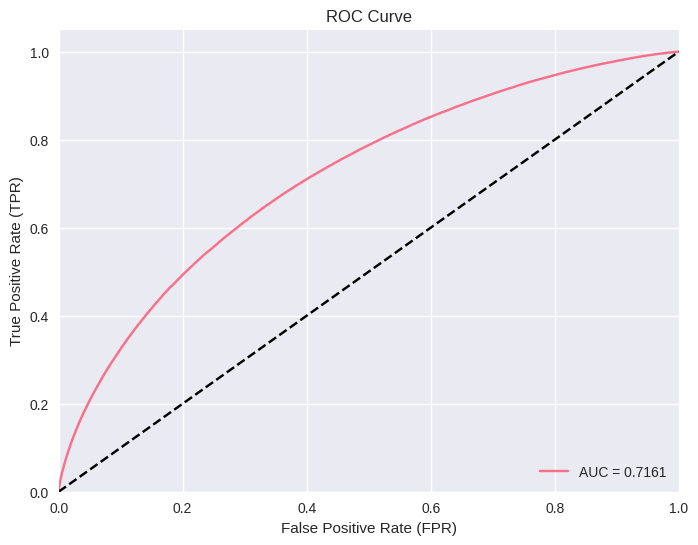

In [173]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Accuracy: 0.8210
AUC Score: 0.7161


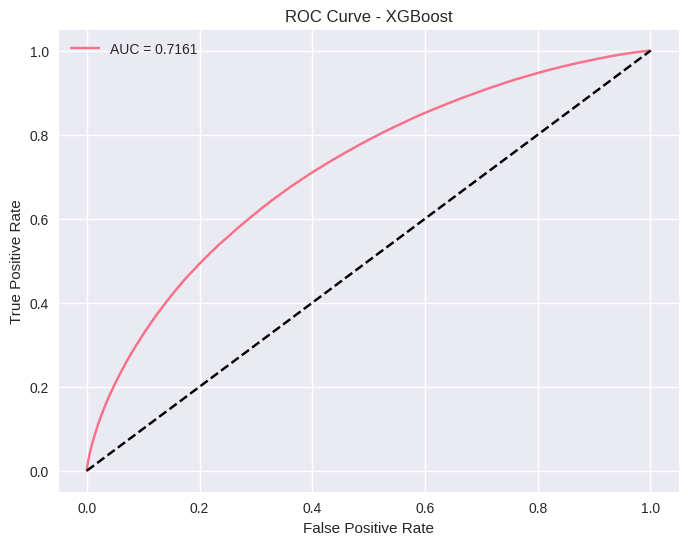

In [182]:
# ✅ Correct import
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize model
xgb_model = XGBClassifier(
    random_state=0,
    eval_metric='logloss'
)

# Train
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


In [185]:
# ✅ Correct imports
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 250],
    'subsample': [0.6, 1.0]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    random_state=0,
    eval_metric='logloss'
)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

# Fit the grid search model
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}
Best AUC Score: nan


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 250],
    'subsample': [0.6, 1.0]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=0, eval_metric='logloss')

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='roc_auc', 
                           verbose=1, 
                           n_jobs=-1)

# Fit the grid search model
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import numpy as np

# Ensure binary labels
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fill missing values in features
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Initialize XGBClassifier correctly
xgb_model = XGBClassifier(random_state=0, eval_metric='auc')

# Fit grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Evaluate
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
print("Test AUC:", roc_auc_score(y_test, y_pred_proba))


Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [186]:
print(y_train.value_counts())
print(y_test.value_counts())


DELAYED
0    3804512
1     850751
Name: count, dtype: int64
DELAYED
0    951128
1    212688
Name: count, dtype: int64


In [187]:
print(np.isnan(X_train).sum().sum())
print(np.isnan(X_test).sum().sum())


0
0
